- TO DROP :  'Range F 14'
- TO KEEP : 'Beta', 'Pdyn', 'RmsBob'

'B', 'Bx_rms', 'By_rms', 'Bz_rms', 

'Range F 0', 'Range F 1',
'Range F 2', 'Range F 3', 
'Range F 6','Range F 7', 
'Range F 9', 'Range F 11', 'Range F 12', 

'Vth', 
'Beta', 
'RmsBob', 

'target',

'Range F 13_diff', 
'Range F 1_diff', 
'Beta_diff',
'RmsBob_diff',
'Beta_t-1', 
'Beta_d-1'

In [52]:
import warnings
warnings.filterwarnings("ignore")

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime

In [181]:
from problem import get_train_data

data_train, labels_train = get_train_data()

In [182]:
from problem import get_test_data

data_test, labels_test = get_test_data()

In [183]:
df = data_train.copy()
df['target'] = labels_train

In [81]:
df['Beta_diff'] = df['Beta'].diff(periods=144)
df['Range F 13_diff'] = df['Range F 4'].diff(periods=144)
df['RmsBob_diff'] = df['RmsBob'].diff(periods=144)
df['Range F 1_diff'] = df['Range F 1'].diff(periods=144)

df['Beta_d-1'] = df['Beta'].shift(144)
df['Beta_t-1'] = df['Beta'].shift(1)

In [82]:
df['Beta_diff'] = df['Beta'].diff(periods=144)
df['Vx_diff'] = df['Vx'].diff(periods=144)
df['Range F 4_diff'] = df['Range F 4'].diff(periods=144)
df['RmsBob_diff'] = df['RmsBob'].diff(periods=144)
df['Range F 1_diff'] = df['Range F 1'].diff(periods=144)

In [83]:
df['Beta_d-1'] = df['Beta'].shift(144)
df['Beta_y-1'] = df['Beta'].shift(144*365)
df['Beta_m-1'] = df['Beta'].shift(144*30)
df['Beta_t-1'] = df['Beta'].shift(1)

In [84]:
df['RmsBob_d-1'] = df['RmsBob'].shift(144)
df['RmsBob_y-1'] = df['RmsBob'].shift(144*365)
df['RmsBob_m-1'] = df['RmsBob'].shift(144*30)
df['RmsBob_t-1'] = df['RmsBob'].shift(1)

In [85]:
df['Pdyn_d-1'] = df['Pdyn'].shift(144)
df['Pdyn_y-1'] = df['Pdyn'].shift(144*365)
df['Pdyn_m-1'] = df['Pdyn'].shift(144*30)
df['Pdyn_t-1'] = df['Pdyn'].shift(1)

In [86]:
df['Range F 13_diff'] = df['Range F 13'].diff(periods=144)
df['Range F 5_diff'] = df['Range F 5'].diff(periods=144)
df['V_diff'] = df['V'].diff(periods=144)
df['Range F 1_diff'] = df['Range F 1'].diff(periods=144)

In [87]:
df['Vx_diff'] = df['Vx'].diff(periods=144)
df['Range F 4_diff'] = df['Range F 4'].diff(periods=144)
df['Beta_y-1'] = df['Beta'].shift(144*365)
df['Beta_t-1'] = df['Beta'].shift(1)

In [88]:
df = df.drop(columns=['Range F 14', 'By_rms', 'Range F 0', 'Range F 1', 'Range F 13', 'Range F 2', 'Range F 3', 'Bz_rms', 'Bx_rms', 'Np_nl'], axis=1)


In [91]:
df.shape

(509834, 44)

In [187]:
# Perform the Fourier Transform
df['fouriermag_Beta'] = np.abs(np.fft.fft(df['Beta']))
df['fouriermag_B'] = np.abs(np.fft.fft(df['B']))
df['fouriermag_RmsBob'] = np.abs(np.fft.fft(df['RmsBob']))
df['fouriermag_Pdyn'] = np.abs(np.fft.fft(df['Pdyn']))

df['fourierpowspec_Beta'] = df['fouriermag_Beta']**2
df['fourierpowspec_B'] = df['fouriermag_B']**2
df['fourierpowspec_RmsBob'] = df['fouriermag_RmsBob']**2
df['fourierpowspec_Pdyn'] = df['fouriermag_Pdyn']**2

# Obtain the frequencies
df['freq_fourier'] = np.fft.fftfreq(df.shape[0])

In [188]:
df.shape

(509834, 43)

In [189]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

# Séparer les données en X et y
X = df.drop(columns=['target'], axis=1)
y = df['target']
X2 = X.fillna(0)

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tqdm(tscv.split(X2)):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    classifier = RandomForestClassifier(max_depth=100, random_state=42)#LogisticRegression()
    model =make_pipeline(StandardScaler(), classifier)

    #model.set_params(class_weight='balanced_subsample')
    
    model.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0it [00:00, ?it/s]

0.8810313985783552


1it [01:27, 87.18s/it]

0.2969447450857886
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     71206
           1       0.87      0.31      0.46     13766

    accuracy                           0.88     84972
   macro avg       0.87      0.65      0.70     84972
weighted avg       0.88      0.88      0.86     84972

The balanced accuracy of the default model is 0.652
0.8543755590076731


2it [04:44, 152.07s/it]

0.3767234254832656
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     69883
           1       0.64      0.42      0.51     15089

    accuracy                           0.85     84972
   macro avg       0.76      0.68      0.71     84972
weighted avg       0.84      0.85      0.84     84972

The balanced accuracy of the default model is 0.685
0.932648401826484


3it [09:58, 225.92s/it]

0.26144539805168815
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     77546
           1       0.70      0.40      0.51      7426

    accuracy                           0.93     84972
   macro avg       0.82      0.69      0.74     84972
weighted avg       0.92      0.93      0.92     84972

The balanced accuracy of the default model is 0.691
0.9479240220307866


4it [17:13, 308.32s/it]

0.17467955191043152
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     77756
           1       0.77      0.55      0.64      7216

    accuracy                           0.95     84972
   macro avg       0.86      0.77      0.81     84972
weighted avg       0.94      0.95      0.94     84972

The balanced accuracy of the default model is 0.769
0.9667890599256226


5it [26:44, 320.96s/it]

0.167526854447443
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     81981
           1       0.58      0.20      0.29      2991

    accuracy                           0.97     84972
   macro avg       0.78      0.60      0.64     84972
weighted avg       0.96      0.97      0.96     84972

The balanced accuracy of the default model is 0.595


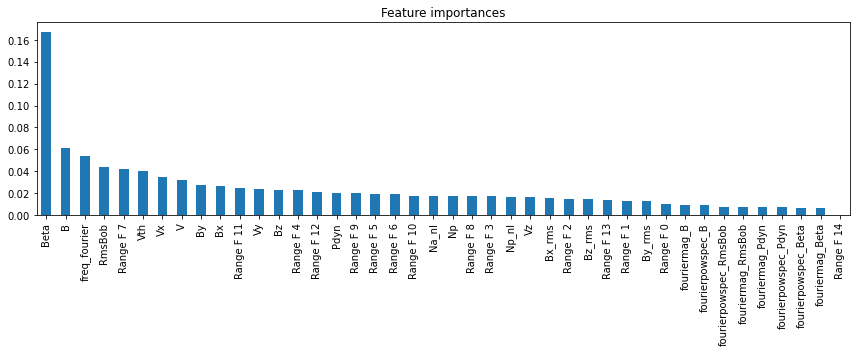

In [190]:
rf_features_importance(classifier, cols=X_train.columns)

TO KEEP : freq_fourier

In [153]:
df['hour'] = df.index.hour
df['day_of_year'] = df.index.day_of_year
df['month'] = df.index.month
df['year'] = df.index.year
df['min'] = df.index.minute
df['week'] = df.index.week
df['weekofyear'] = df.index.weekofyear
df['dayofweek'] = df.index.dayofweek
df['quarter'] = df.index.quarter

In [154]:
df.shape

(509834, 43)

In [155]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

# Séparer les données en X et y
X = df.drop(columns=['target'], axis=1)
y = df['target']
X2 = X.fillna(0)

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tqdm(tscv.split(X2)):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    classifier = RandomForestClassifier(max_depth=100, random_state=42)#LogisticRegression()
    model =make_pipeline(StandardScaler(), classifier)

    #model.set_params(class_weight='balanced_subsample')
    
    model.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0it [00:00, ?it/s]

0.8831615120274914


1it [01:07, 67.49s/it]

0.2955322852764915
              precision    recall  f1-score   support

           0       0.89      0.99      0.93     71206
           1       0.83      0.35      0.49     13766

    accuracy                           0.88     84972
   macro avg       0.86      0.67      0.71     84972
weighted avg       0.88      0.88      0.86     84972

The balanced accuracy of the default model is 0.668
0.8540931130254672


2it [03:45, 120.88s/it]

0.41702181009446604
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     69883
           1       0.68      0.34      0.45     15089

    accuracy                           0.85     84972
   macro avg       0.77      0.65      0.68     84972
weighted avg       0.84      0.85      0.83     84972

The balanced accuracy of the default model is 0.652
0.929412041613708


3it [07:58, 181.08s/it]

0.22637888785083116
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     77546
           1       0.72      0.31      0.44      7426

    accuracy                           0.93     84972
   macro avg       0.83      0.65      0.70     84972
weighted avg       0.92      0.93      0.92     84972

The balanced accuracy of the default model is 0.650
0.944781810478746


4it [13:56, 251.12s/it]

0.17425368290147975
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     77756
           1       0.78      0.48      0.60      7216

    accuracy                           0.94     84972
   macro avg       0.87      0.74      0.78     84972
weighted avg       0.94      0.94      0.94     84972

The balanced accuracy of the default model is 0.735
0.9676599350374241


5it [21:28, 257.73s/it]

0.15443866972364087
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     81981
           1       0.68      0.16      0.25      2991

    accuracy                           0.97     84972
   macro avg       0.82      0.58      0.62     84972
weighted avg       0.96      0.97      0.96     84972

The balanced accuracy of the default model is 0.577


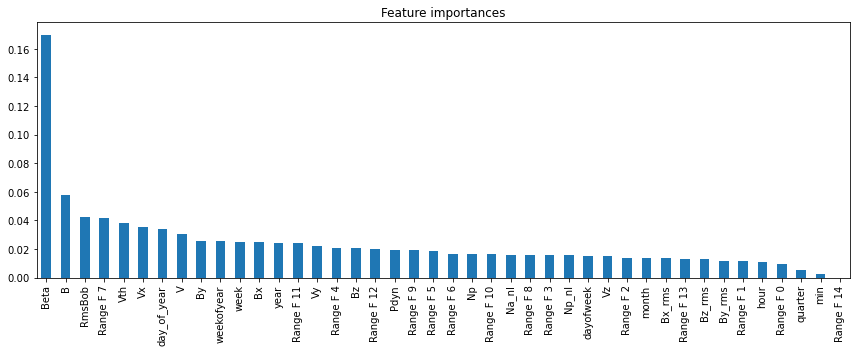

In [156]:
rf_features_importance(classifier, cols=X_train.columns)

TO KEEP : day_of_year, week, year, dayofweek, month, hour

In [165]:
pd.Series(classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)[pd.Series(classifier.feature_importances_, index=X_train.columns)>0.015]

Beta           0.170057
B              0.057497
RmsBob         0.042287
Range F 7      0.041806
Vth            0.038178
Vx             0.035338
day_of_year    0.034065
V              0.030323
By             0.025857
weekofyear     0.025435
week           0.024670
Bx             0.024654
year           0.024320
Range F 11     0.024164
Vy             0.021836
Range F 4      0.021018
Bz             0.020399
Range F 12     0.019917
Pdyn           0.019158
Range F 9      0.019091
Range F 5      0.018374
Range F 6      0.016629
Np             0.016595
Range F 10     0.016575
Na_nl          0.016060
Range F 8      0.016019
Range F 3      0.015969
Np_nl          0.015674
dayofweek      0.015370
dtype: float64

In [93]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

# Séparer les données en X et y
X = df.drop(columns=['target'], axis=1)
y = df['target']
X2 = X.fillna(0)

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tqdm(tscv.split(X2)):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    classifier = RandomForestClassifier(max_depth=100, random_state=42)#LogisticRegression()
    model =make_pipeline(StandardScaler(), classifier)

    #model.set_params(class_weight='balanced_subsample')
    
    model.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0it [00:00, ?it/s]

0.8812550016476015


1it [01:25, 85.04s/it]

0.3179661783277235
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     71206
           1       0.85      0.33      0.47     13766

    accuracy                           0.88     84972
   macro avg       0.86      0.66      0.70     84972
weighted avg       0.88      0.88      0.86     84972

The balanced accuracy of the default model is 0.658
0.864367085628207


2it [04:41, 150.45s/it]

0.4245064328159404
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     69883
           1       0.71      0.39      0.51     15089

    accuracy                           0.86     84972
   macro avg       0.80      0.68      0.71     84972
weighted avg       0.85      0.86      0.85     84972

The balanced accuracy of the default model is 0.680
0.9297415619262815


3it [09:56, 225.69s/it]

0.22549206752079756
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     77546
           1       0.70      0.34      0.46      7426

    accuracy                           0.93     84972
   macro avg       0.82      0.66      0.71     84972
weighted avg       0.92      0.93      0.92     84972

The balanced accuracy of the default model is 0.663
0.9526902979805112


4it [17:29, 315.23s/it]

0.16158990536977877
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     77756
           1       0.82      0.57      0.67      7216

    accuracy                           0.95     84972
   macro avg       0.89      0.78      0.82     84972
weighted avg       0.95      0.95      0.95     84972

The balanced accuracy of the default model is 0.779
0.9720260791790237


5it [27:21, 328.23s/it]

0.11998722876900822
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     81981
           1       0.84      0.25      0.39      2991

    accuracy                           0.97     84972
   macro avg       0.91      0.63      0.69     84972
weighted avg       0.97      0.97      0.96     84972

The balanced accuracy of the default model is 0.626


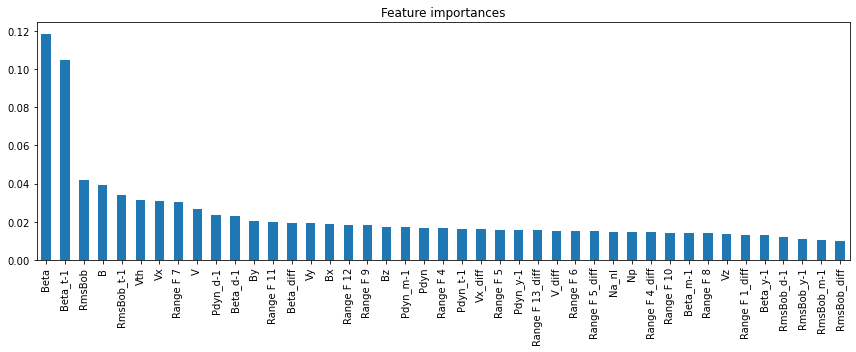

In [96]:
rf_features_importance(classifier, cols=X_train.columns)

In [108]:
pd.Series(classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)[pd.Series(classifier.feature_importances_, index=X_train.columns)>0.015]

Beta               0.118452
Beta_t-1           0.104856
RmsBob             0.041893
B                  0.039390
RmsBob_t-1         0.033941
Vth                0.031549
Vx                 0.030689
Range F 7          0.030208
V                  0.026758
Pdyn_d-1           0.023727
Beta_d-1           0.022938
By                 0.020354
Range F 11         0.020036
Beta_diff          0.019446
Vy                 0.019347
Bx                 0.018595
Range F 12         0.018303
Range F 9          0.018112
Bz                 0.017284
Pdyn_m-1           0.017194
Pdyn               0.016657
Range F 4          0.016491
Pdyn_t-1           0.016230
Vx_diff            0.016059
Range F 5          0.015604
Pdyn_y-1           0.015548
Range F 13_diff    0.015504
V_diff             0.015350
dtype: float64

In [110]:
df[pd.Series(classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)[pd.Series(classifier.feature_importances_, index=X_train.columns)>0.015].index].shape

(509834, 28)

In [ ]:
['Beta','Beta_t-1','RmsBob','B','RmsBob_t-1','Vth','Vx','Range F 7','V','Pdyn_d-1','Beta_d-1','By','Range F 11','Beta_diff'          
 ,'Vy','Bx','Range F 12','Range F 9','Bz','Pdyn_m-1','Pdyn','Range F 4','Pdyn_t-1','Vx_diff','Range F 5','Pdyn_y-1','Range F 13_diff','V_diff']            

In [113]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

# Séparer les données en X et y
X = df[['Beta','Beta_t-1','RmsBob','B','RmsBob_t-1','Vth','Vx','Range F 7','V','Pdyn_d-1','Beta_d-1','By','Range F 11','Beta_diff'          
 ,'Vy','Bx','Range F 12','Range F 9','Bz','Pdyn_m-1','Pdyn','Range F 4','Pdyn_t-1','Vx_diff','Range F 5','Pdyn_y-1','Range F 13_diff','V_diff']]
y = df['target']
X2 = X.fillna(0)

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tqdm(tscv.split(X2)):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    classifier = HistGradientBoostingClassifier()#LogisticRegression()
    model =make_pipeline(StandardScaler(), classifier)

    #model.set_params(class_weight='balanced_subsample')
    
    model.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0it [00:00, ?it/s]

0.8848091135903592
0.31085738768522325


1it [00:02,  2.55s/it]

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     71206
           1       0.80      0.38      0.52     13766

    accuracy                           0.88     84972
   macro avg       0.85      0.68      0.73     84972
weighted avg       0.88      0.88      0.87     84972

The balanced accuracy of the default model is 0.683
0.8637904250812032
0.34029657835112476


2it [00:05,  3.04s/it]

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     69883
           1       0.68      0.43      0.53     15089

    accuracy                           0.86     84972
   macro avg       0.79      0.70      0.73     84972
weighted avg       0.85      0.86      0.85     84972

The balanced accuracy of the default model is 0.695
0.929682719013322


3it [00:10,  3.97s/it]

0.18414958079164204
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     77546
           1       0.67      0.39      0.49      7426

    accuracy                           0.93     84972
   macro avg       0.81      0.68      0.73     84972
weighted avg       0.92      0.93      0.92     84972

The balanced accuracy of the default model is 0.685
0.9514663653909523
0.1404421578422633


4it [00:16,  4.59s/it]

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     77756
           1       0.77      0.61      0.68      7216

    accuracy                           0.95     84972
   macro avg       0.87      0.80      0.83     84972
weighted avg       0.95      0.95      0.95     84972

The balanced accuracy of the default model is 0.796
0.9725556653956597
0.07784087742894874


5it [00:22,  4.59s/it]

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     81981
           1       0.79      0.30      0.43      2991

    accuracy                           0.97     84972
   macro avg       0.88      0.65      0.71     84972
weighted avg       0.97      0.97      0.97     84972

The balanced accuracy of the default model is 0.648


In [138]:
from sklearn.model_selection import GridSearchCV
X = df[['Beta','Beta_t-1','RmsBob','B','RmsBob_t-1','Vth','Vx','Range F 7','V','Pdyn_d-1','Beta_d-1','By','Range F 11','Beta_diff']]
y = df['target']
X2 = X.fillna(0)
#parameters to tune
parameters = {
 'classifier__max_iter': [1000,1200,1500],
 'classifier__learning_rate': [0.1],
 'classifier__max_depth' : [25, 50, 75],
 'classifier__l2_regularization': [1.5],
 }

'''n_jobs=5, 
cv=5, scoring=’f1_micro’,
verbose=2, refit=True'''
tscv = TimeSeriesSplit(n_splits=5)
gsearch = GridSearchCV(estimator=model, cv=tscv,
                        param_grid=parameters, scoring=['f1'], refit=False, verbose=2, n_jobs=5)
gsearch.fit(X2, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        HistGradientBoostingClassifier())]),
             n_jobs=5,
             param_grid={'classifier__l2_regularization': [1.5],
                         'classifier__learning_rate': [0.1],
                         'classifier__max_depth': [25, 50, 75],
                         'classifier__max_iter': [1000, 1200, 1500]},
             refit=False, scoring=['f1'], verbose=2)

In [142]:
gsearch.cv_results_

{'mean_fit_time': array([46.65863719, 53.27774849, 63.32063937, 44.01643453, 51.74956059,
        63.0837678 , 43.75195961, 52.09145312, 58.1639946 ]),
 'std_fit_time': array([18.45828592, 19.76657855, 26.74356331, 17.17182313, 21.3362614 ,
        26.70070914, 17.13765532, 20.30932526, 22.64022652]),
 'mean_score_time': array([3.62726498, 4.06037211, 4.83983102, 3.49992661, 3.97079716,
        4.93695397, 3.47851052, 3.99657989, 4.43796601]),
 'std_score_time': array([0.26379132, 0.30435011, 0.18700258, 0.23697258, 0.15104713,
        0.20042107, 0.22141719, 0.48333625, 0.53273306]),
 'param_classifier__l2_regularization': masked_array(data=[1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_classifier__learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
              mask=[False, False, False, False

[CV] END classifier__l2_regularization=1.5, classifier__learning_rate=0.1, classifier__max_depth=25, classifier__max_iter=1000; total time=  37.3s
[CV] END classifier__l2_regularization=1.5, classifier__learning_rate=0.1, classifier__max_depth=25, classifier__max_iter=1200; total time=  43.8s
[CV] END classifier__l2_regularization=1.5, classifier__learning_rate=0.1, classifier__max_depth=25, classifier__max_iter=1500; total time=  51.1s
[CV] END classifier__l2_regularization=1.5, classifier__learning_rate=0.1, classifier__max_depth=50, classifier__max_iter=1000; total time=  23.7s
[CV] END classifier__l2_regularization=1.5, classifier__learning_rate=0.1, classifier__max_depth=50, classifier__max_iter=1000; total time=  47.5s
[CV] END classifier__l2_regularization=1.5, classifier__learning_rate=0.1, classifier__max_depth=50, classifier__max_iter=1200; total time=  41.7s
[CV] END classifier__l2_regularization=1.5, classifier__learning_rate=0.1, classifier__max_depth=50, classifier__max_i

In [128]:
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [ ]:
 {'classifier__l2_regularization': 1.5,
   'classifier__learning_rate': 0.1,
   'classifier__max_depth': 50,
   'classifier__max_iter': 1000}

In [144]:
#################################    BEST MODEL SO FAR #################################

from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
from sklearn.pipeline import Pipeline


# Séparer les données en X et y
X = df[['Beta','Beta_t-1','RmsBob','B','RmsBob_t-1','Vth','Vx','Range F 7','V','Pdyn_d-1','Beta_d-1','By','Range F 11','Beta_diff']]
y = df['target']
X2 = X.fillna(0)

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tqdm(tscv.split(X2)):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    classifier = HistGradientBoostingClassifier(l2_regularization= 1.5, learning_rate= 0.1, max_depth= 50,max_iter= 1000)#LogisticRegression()
    model =Pipeline(steps=[("scaler", StandardScaler()), ("classifier", classifier)])

    #model.set_params(class_weight='balanced_subsample')
    
    model.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0it [00:00, ?it/s]

0.8816904392035023


1it [00:12, 12.32s/it]

0.38884783219979036
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     71206
           1       0.69      0.49      0.57     13766

    accuracy                           0.88     84972
   macro avg       0.80      0.72      0.75     84972
weighted avg       0.87      0.88      0.87     84972

The balanced accuracy of the default model is 0.723
[CV] END classifier__l2_regularization=1.5, classifier__learning_rate=0.1, classifier__max_depth=25, classifier__max_iter=1000; total time= 1.3min
[CV] END classifier__l2_regularization=1.5, classifier__learning_rate=0.1, classifier__max_depth=25, classifier__max_iter=1500; total time=  28.1s
[CV] END classifier__l2_regularization=1.5, classifier__learning_rate=0.1, classifier__max_depth=25, classifier__max_iter=1500; total time= 1.2min
[CV] END classifier__l2_regularization=1.5, classifier__learning_rate=0.1, classifier__max_depth=50, classifier__max_iter=1000; total time= 1.0min
[CV] END clas

2it [00:27, 13.81s/it]

0.4161671698469433
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     69883
           1       0.63      0.46      0.53     15089

    accuracy                           0.86     84972
   macro avg       0.76      0.70      0.72     84972
weighted avg       0.84      0.86      0.85     84972

The balanced accuracy of the default model is 0.701
0.9260226898272372


3it [00:44, 15.59s/it]

0.20431162724167065
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     77546
           1       0.62      0.39      0.48      7426

    accuracy                           0.93     84972
   macro avg       0.78      0.68      0.72     84972
weighted avg       0.92      0.93      0.92     84972

The balanced accuracy of the default model is 0.683
0.9471590641623123


4it [01:06, 18.06s/it]

0.14978337766385
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     77756
           1       0.72      0.61      0.66      7216

    accuracy                           0.95     84972
   macro avg       0.84      0.80      0.82     84972
weighted avg       0.94      0.95      0.95     84972

The balanced accuracy of the default model is 0.796
0.9730499458645201


5it [01:30, 18.10s/it]

0.09040163646012653
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     81981
           1       0.75      0.36      0.48      2991

    accuracy                           0.97     84972
   macro avg       0.86      0.68      0.73     84972
weighted avg       0.97      0.97      0.97     84972

The balanced accuracy of the default model is 0.675


In [137]:
#################################    BEST MODEL SO FAR #################################

from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
from sklearn.pipeline import Pipeline


# Séparer les données en X et y
X = df[['Beta','Beta_t-1','RmsBob','B','RmsBob_t-1','Vth','Vx','Range F 7','V','Pdyn_d-1','Beta_d-1','By','Range F 11','Beta_diff']]
y = df['target']
X2 = X.fillna(0)

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tqdm(tscv.split(X2)):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    classifier = HistGradientBoostingClassifier()#LogisticRegression()
    model =Pipeline(steps=[("scaler", StandardScaler()), ("classifier", classifier)])

    #model.set_params(class_weight='balanced_subsample')
    
    model.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0it [00:00, ?it/s]

0.8911288424422162
0.2784643511484139


1it [00:02,  2.02s/it]

              precision    recall  f1-score   support

           0       0.91      0.96      0.94     71206
           1       0.72      0.53      0.61     13766

    accuracy                           0.89     84972
   macro avg       0.82      0.75      0.78     84972
weighted avg       0.88      0.89      0.88     84972

The balanced accuracy of the default model is 0.747
0.8642611683848798
0.3304948568101087


2it [00:04,  2.21s/it]

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     69883
           1       0.66      0.48      0.56     15089

    accuracy                           0.86     84972
   macro avg       0.78      0.71      0.74     84972
weighted avg       0.85      0.86      0.86     84972

The balanced accuracy of the default model is 0.714
0.9282822576848845
0.18725981520302137


3it [00:07,  2.81s/it]

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     77546
           1       0.65      0.39      0.49      7426

    accuracy                           0.93     84972
   macro avg       0.80      0.68      0.72     84972
weighted avg       0.92      0.93      0.92     84972

The balanced accuracy of the default model is 0.684
0.951101539330603
0.1429682478092429


4it [00:11,  3.14s/it]

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     77756
           1       0.76      0.63      0.69      7216

    accuracy                           0.95     84972
   macro avg       0.86      0.80      0.83     84972
weighted avg       0.95      0.95      0.95     84972

The balanced accuracy of the default model is 0.804
0.9753330508873511
0.0752250846222121


5it [00:15,  3.11s/it]

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     81981
           1       0.77      0.42      0.55      2991

    accuracy                           0.98     84972
   macro avg       0.88      0.71      0.77     84972
weighted avg       0.97      0.98      0.97     84972

The balanced accuracy of the default model is 0.710


In [122]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

# Séparer les données en X et y
X = df[['Beta','Beta_t-1','RmsBob','B','RmsBob_t-1','Vth','Vx','Range F 7','V','By','Range F 11']]
y = df['target']
X2 = X.fillna(0)

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tqdm(tscv.split(X2)):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    classifier = HistGradientBoostingClassifier()#LogisticRegression()
    model =make_pipeline(StandardScaler(), classifier)

    #model.set_params(class_weight='balanced_subsample')
    
    model.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0it [00:00, ?it/s]

0.8892929435578779
0.2838379692722304


1it [00:01,  1.60s/it]

              precision    recall  f1-score   support

           0       0.91      0.96      0.94     71206
           1       0.72      0.52      0.60     13766

    accuracy                           0.89     84972
   macro avg       0.82      0.74      0.77     84972
weighted avg       0.88      0.89      0.88     84972

The balanced accuracy of the default model is 0.740
0.8624252695005413
0.3382378299040176


2it [00:03,  1.93s/it]

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     69883
           1       0.66      0.46      0.54     15089

    accuracy                           0.86     84972
   macro avg       0.78      0.70      0.73     84972
weighted avg       0.85      0.86      0.85     84972

The balanced accuracy of the default model is 0.705
0.9287647695711528
0.18809405341287772


3it [00:06,  2.40s/it]

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     77546
           1       0.65      0.41      0.50      7426

    accuracy                           0.93     84972
   macro avg       0.80      0.69      0.73     84972
weighted avg       0.92      0.93      0.92     84972

The balanced accuracy of the default model is 0.695
0.9491244174551617
0.15238813710594454


4it [00:10,  2.75s/it]

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     77756
           1       0.75      0.60      0.67      7216

    accuracy                           0.95     84972
   macro avg       0.86      0.79      0.82     84972
weighted avg       0.95      0.95      0.95     84972

The balanced accuracy of the default model is 0.792
0.9745680930188768
0.0823647533069239


5it [00:13,  2.78s/it]

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     81981
           1       0.75      0.42      0.54      2991

    accuracy                           0.97     84972
   macro avg       0.86      0.71      0.76     84972
weighted avg       0.97      0.97      0.97     84972

The balanced accuracy of the default model is 0.706


In [7]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier


# Séparer les données en X et y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    
    model = RandomForestClassifier(random_state=42)#LogisticRegression()
    
    #model.set_params(class_weight='balanced_subsample')
    
    model.fit(X_train, y_train, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8894812408793485
3.983499846740093
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     71206
           1       0.74      0.49      0.59     13766

    accuracy                           0.89     84972
   macro avg       0.83      0.73      0.76     84972
weighted avg       0.88      0.89      0.88     84972

The balanced accuracy of the default model is 0.726
0.8595419667655227
5.062620665620595
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     69883
           1       0.68      0.40      0.50     15089

    accuracy                           0.86     84972
   macro avg       0.78      0.68      0.71     84972
weighted avg       0.84      0.86      0.84     84972

The balanced accuracy of the default model is 0.679
0.9315421550628442
2.467470834680771
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     77546
           1       0.7

In [95]:
def rf_features_importance(model, cols):
    '''
    Plot feature_importance from a random forest model

    Input:
    model (MODEL_TYPE) : Model for which to compute the feature importance
    cols (list) : input DataFrame with true labels

    Output:
    None
    '''
    # get feature importance from model
    importances = model.feature_importances_
    forest_importances = pd.Series(importances, index=cols).sort_values(ascending=False)
    # plot results
    fig, ax = plt.subplots(figsize=(12, 5))
    forest_importances.plot.bar(ax=ax)
    ax.set_title("Feature importances")
    fig.tight_layout()

In [24]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.04)
selector.fit_transform(df)
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True])

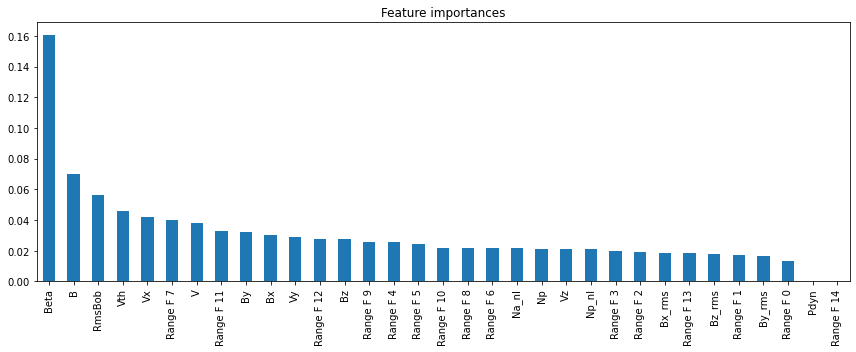

In [21]:
rf_features_importance(model, cols=X_train.columns)

In [25]:
import shap

def plot_shapley_values(model):
    '''
    Plot the shapley graph of the given model.
    ##########################################################################
    WARNING : Do not use it on random forest as it takes a huge amout of time.
    ##########################################################################
    Input:
    model (MODEL_TYPE) : Model for which to explain the predictions

    Output:
    None
    '''
    try:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(data_test)
        shap.summary_plot(shap_values, data_test)
    except (InvalidModelError, TypeError) as error:
        explainer = shap.Explainer(model, data_test)
        shap_values = explainer.shap_values(data_test)
        shap.summary_plot(shap_values, data_test)

In [ ]:
plot_shapley_values(model)

In [8]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier


# Séparer les données en X et y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    
    model =LogisticRegression()
    
    #model.set_params(class_weight='balanced_subsample')
    
    model.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8644141599585746
0.39554470762359123
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     71206
           1       0.74      0.25      0.37     13766

    accuracy                           0.86     84972
   macro avg       0.81      0.62      0.65     84972
weighted avg       0.85      0.86      0.83     84972

The balanced accuracy of the default model is 0.616
0.8360165701642894
0.46531718834986174
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     69883
           1       0.68      0.15      0.24     15089

    accuracy                           0.84     84972
   macro avg       0.76      0.57      0.57     84972
weighted avg       0.81      0.84      0.79     84972

The balanced accuracy of the default model is 0.565
0.9149013792778797
0.3349477803477643
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     77546
           1     

In [12]:
df[['Beta', 'Pdyn', 'RmsBob']]

,Beta,Pdyn,RmsBob
1997-10-01 00:00:00,7.641340,5.487331e-15,0.668473
1997-10-01 00:10:00,9.149856,4.783776e-15,0.753848
1997-10-01 00:20:00,11.924199,3.719768e-15,0.282667
1997-10-01 00:30:00,16.032987,3.525211e-15,0.304713
1997-10-01 00:40:00,10.253789,3.694283e-15,0.244203
...,...,...,...
2007-12-31 23:10:00,1.304273,1.411728e-15,0.247082
2007-12-31 23:20:00,0.982693,1.335080e-15,0.139195
2007-12-31 23:30:00,0.989657,1.278599e-15,0.124656
2007-12-31 23:40:00,0.958408,1.267188e-15,0.080642


In [13]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Séparer les données en X et y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    
    classifier = LogisticRegression()
    model =make_pipeline(StandardScaler(), classifier)
    
    #model.set_params(class_weight='balanced_subsample')
    
    model.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8867862354658005
0.3138389435902955
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     71206
           1       0.74      0.46      0.57     13766

    accuracy                           0.89     84972
   macro avg       0.82      0.71      0.75     84972
weighted avg       0.88      0.89      0.88     84972

The balanced accuracy of the default model is 0.714
0.860589370616203
0.3562993429100401
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     69883
           1       0.74      0.33      0.46     15089

    accuracy                           0.86     84972
   macro avg       0.81      0.65      0.69     84972
weighted avg       0.85      0.86      0.84     84972

The balanced accuracy of the default model is 0.653
0.9309890316810243
0.2038037400149322
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     77546
           1       0

In [48]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier

# Séparer les données en X et y
X = df[['Beta', 'Pdyn', 'RmsBob']]
y = df['target']

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    
    classifier = HistGradientBoostingClassifier()
    model =make_pipeline(StandardScaler(), classifier)
    
    #model.set_params(class_weight='balanced_subsample')
    
    model.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8856564515369769
0.2870156329640988
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     71206
           1       0.74      0.45      0.56     13766

    accuracy                           0.89     84972
   macro avg       0.82      0.71      0.75     84972
weighted avg       0.88      0.89      0.87     84972

The balanced accuracy of the default model is 0.712
0.8655204067222144
0.3332941767754087
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     69883
           1       0.70      0.42      0.53     15089

    accuracy                           0.87     84972
   macro avg       0.79      0.69      0.72     84972
weighted avg       0.85      0.87      0.85     84972

The balanced accuracy of the default model is 0.692
0.9308125029421457
0.18614824984445782
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     77546
           1      

In [49]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier

# Séparer les données en X et y
X = df[['Beta', 'Pdyn', 'RmsBob']]
y = df['target']

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    
    classifier = HistGradientBoostingClassifier(class_weight='balanced')
    model =make_pipeline(StandardScaler(), classifier)
    
    #model.set_params(class_weight='balanced_subsample')
    
    model.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.81977592618745
0.3983137811918459
              precision    recall  f1-score   support

           0       0.95      0.83      0.88     71206
           1       0.47      0.78      0.58     13766

    accuracy                           0.82     84972
   macro avg       0.71      0.80      0.73     84972
weighted avg       0.87      0.82      0.84     84972

The balanced accuracy of the default model is 0.804
0.7856705738360872
0.46079192712879347
              precision    recall  f1-score   support

           0       0.94      0.79      0.86     69883
           1       0.44      0.77      0.56     15089

    accuracy                           0.79     84972
   macro avg       0.69      0.78      0.71     84972
weighted avg       0.85      0.79      0.81     84972

The balanced accuracy of the default model is 0.778
0.8727227792684649
0.30946172446168896
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     77546
           1       

In [50]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Séparer les données en X et y
X = df[['Beta', 'B', 'RmsBob','Range F 7', 'Range F 9', 'Range F 11', 'Range F 12','Range F 13_diff', 'Range F 1_diff', 'Beta_diff', 'RmsBob_diff', 'Beta_t-1', 'Beta_d-1']]
y = df['target']

X2 = X.fillna(0)

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X2):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    
    classifier = HistGradientBoostingClassifier()
    model =make_pipeline(StandardScaler(), classifier)
    
    #model.set_params(class_weight='balanced_subsample')
    
    model.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8893164807230617
0.2716898142986327
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     71206
           1       0.71      0.53      0.61     13766

    accuracy                           0.89     84972
   macro avg       0.81      0.74      0.77     84972
weighted avg       0.88      0.89      0.88     84972

The balanced accuracy of the default model is 0.744
0.86395518523749
0.3392225385521335
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     69883
           1       0.67      0.45      0.54     15089

    accuracy                           0.86     84972
   macro avg       0.78      0.70      0.73     84972
weighted avg       0.85      0.86      0.85     84972

The balanced accuracy of the default model is 0.702
0.9290236783881749
0.18133830037818838
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     77546
           1       0

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Séparer les données en X et y
X = df[['Beta', 'B', 'RmsBob','Range F 7', 'Range F 9', 'Range F 11', 'Range F 12']]
y = df['target']

X2 = X.fillna(0)

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X2):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    
    classifier = HistGradientBoostingClassifier()
    model =make_pipeline(StandardScaler(), classifier)
    
    #model.set_params(class_weight='balanced_subsample')
    
    model.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8867509297180247
0.28775134119087825
              precision    recall  f1-score   support

           0       0.91      0.97      0.93     71206
           1       0.73      0.48      0.58     13766

    accuracy                           0.89     84972
   macro avg       0.82      0.72      0.76     84972
weighted avg       0.88      0.89      0.88     84972

The balanced accuracy of the default model is 0.723
0.864367085628207
0.3389009575079503
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     69883
           1       0.69      0.43      0.53     15089

    accuracy                           0.86     84972
   macro avg       0.79      0.69      0.72     84972
weighted avg       0.85      0.86      0.85     84972

The balanced accuracy of the default model is 0.693
0.9265052017135056
0.1912758254644299
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     77546
           1       

In [44]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Séparer les données en X et y
X = df[['Beta', 'B', 'RmsBob','Range F 7', 'Range F 9', 'Range F 11', 'Range F 12','Range F 13_diff', 'Range F 1_diff', 'Beta_diff', 'RmsBob_diff', 'Beta_t-1', 'Beta_d-1']]
y = df['target']

X2 = X.fillna(0)

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X2):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    
    classifier = LogisticRegression(class_weight='balanced')
    model =make_pipeline(StandardScaler(), classifier)
    
    #model.set_params(class_weight='balanced_subsample')
    
    model.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.7982747257920256
0.4383037120595265
              precision    recall  f1-score   support

           0       0.96      0.79      0.87     71206
           1       0.44      0.83      0.57     13766

    accuracy                           0.80     84972
   macro avg       0.70      0.81      0.72     84972
weighted avg       0.88      0.80      0.82     84972

The balanced accuracy of the default model is 0.813
0.7742315115567481
0.4860008800506927
              precision    recall  f1-score   support

           0       0.94      0.77      0.85     69883
           1       0.43      0.79      0.55     15089

    accuracy                           0.77     84972
   macro avg       0.68      0.78      0.70     84972
weighted avg       0.85      0.77      0.80     84972

The balanced accuracy of the default model is 0.778
0.8536223697217907
0.33906950287854826
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     77546
           1      

In [28]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Séparer les données en X et y
X = df[['Beta', 'B', 'RmsBob','Range F 7', 'Range F 9', 'Range F 11', 'Range F 12',]]
y = df.iloc[:, -1]

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    
    classifier = LogisticRegression(class_weight='balanced')
    model =make_pipeline(StandardScaler(), classifier)
    
    #model.set_params(class_weight='balanced_subsample')
    
    model.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.7872004895730358
0.4542326109351259
              precision    recall  f1-score   support

           0       0.96      0.78      0.86     71206
           1       0.42      0.83      0.56     13766

    accuracy                           0.79     84972
   macro avg       0.69      0.80      0.71     84972
weighted avg       0.87      0.79      0.81     84972

The balanced accuracy of the default model is 0.803
0.7722073153509391
0.4956173993491788
              precision    recall  f1-score   support

           0       0.94      0.77      0.85     69883
           1       0.42      0.77      0.55     15089

    accuracy                           0.77     84972
   macro avg       0.68      0.77      0.70     84972
weighted avg       0.85      0.77      0.79     84972

The balanced accuracy of the default model is 0.772
0.8405239372969919
0.3618867857179801
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     77546
           1       

In [22]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Séparer les données en X et y
X = df[['Beta', 'Pdyn', 'RmsBob', 'Range F 0', 'Range F 1', 'Range F 2', 'Range F 3', 'Range F 6','Range F 7', 'Range F 9', 'Range F 11', 'Range F 12',]]
y = df.iloc[:, -1]

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    
    classifier = LogisticRegression(class_weight='balanced')
    model =make_pipeline(StandardScaler(), classifier)
    
    #model.set_params(class_weight='balanced_subsample')
    
    model.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.7779739208209763
0.4459527084303497
              precision    recall  f1-score   support

           0       0.96      0.77      0.85     71206
           1       0.41      0.84      0.55     13766

    accuracy                           0.78     84972
   macro avg       0.68      0.80      0.70     84972
weighted avg       0.87      0.78      0.80     84972

The balanced accuracy of the default model is 0.802
0.7564844890081439
0.49061000343147226
              precision    recall  f1-score   support

           0       0.94      0.75      0.84     69883
           1       0.40      0.78      0.53     15089

    accuracy                           0.76     84972
   macro avg       0.67      0.76      0.68     84972
weighted avg       0.84      0.76      0.78     84972

The balanced accuracy of the default model is 0.765
0.8361342559902085
0.36285791756975083
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     77546
           1     

In [23]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Séparer les données en X et y
X = df[['Beta', 'Pdyn', 'RmsBob']]
y = df.iloc[:, -1]

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    
    classifier = LogisticRegression(class_weight='balanced')
    model =make_pipeline(StandardScaler(), classifier)
    
    #model.set_params(class_weight='balanced_subsample')
    
    model.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.761050699053806
0.4660862825607834
              precision    recall  f1-score   support

           0       0.96      0.74      0.84     71206
           1       0.39      0.85      0.54     13766

    accuracy                           0.76     84972
   macro avg       0.68      0.80      0.69     84972
weighted avg       0.87      0.76      0.79     84972

The balanced accuracy of the default model is 0.796
0.702725603728287
0.529878258620429
              precision    recall  f1-score   support

           0       0.95      0.67      0.79     69883
           1       0.36      0.84      0.50     15089

    accuracy                           0.70     84972
   macro avg       0.65      0.76      0.64     84972
weighted avg       0.84      0.70      0.74     84972

The balanced accuracy of the default model is 0.755
0.8156686908628725
0.37926482344168566
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     77546
           1       0.

In [59]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Séparer les données en X et y
y = df.iloc[:, -1]
X = df.drop(columns=['target'], axis=1)

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    
    classifier = LogisticRegression()
    model =make_pipeline(StandardScaler(), classifier)
    
    #model.set_params(class_weight='balanced_subsample')
    
    model.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8867862354658005
0.3138389435902955
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     71206
           1       0.74      0.46      0.57     13766

    accuracy                           0.89     84972
   macro avg       0.82      0.71      0.75     84972
weighted avg       0.88      0.89      0.88     84972

The balanced accuracy of the default model is 0.714
0.860589370616203
0.3562993429100401
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     69883
           1       0.74      0.33      0.46     15089

    accuracy                           0.86     84972
   macro avg       0.81      0.65      0.69     84972
weighted avg       0.85      0.86      0.84     84972

The balanced accuracy of the default model is 0.653
0.9309890316810243
0.2038037400149322
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     77546
           1       0

In [58]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Séparer les données en X et y
y = df.iloc[:, -1]
X = df.drop(columns=['target'], axis=1)

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    
    classifier = LogisticRegression(class_weight='balanced')
    model =make_pipeline(StandardScaler(), classifier)
    
    #model.set_params(class_weight='balanced_subsample')
    
    model.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8058183872334416
0.47859604258699434
              precision    recall  f1-score   support

           0       0.96      0.81      0.87     71206
           1       0.45      0.81      0.57     13766

    accuracy                           0.81     84972
   macro avg       0.70      0.81      0.72     84972
weighted avg       0.87      0.81      0.83     84972

The balanced accuracy of the default model is 0.807
0.7886715623970249
0.48529934583031586
              precision    recall  f1-score   support

           0       0.93      0.80      0.86     69883
           1       0.44      0.74      0.55     15089

    accuracy                           0.79     84972
   macro avg       0.69      0.77      0.71     84972
weighted avg       0.85      0.79      0.81     84972

The balanced accuracy of the default model is 0.769
0.867579908675799
0.33134035286779634
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     77546
           1     

In [20]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Séparer les données en X et y
X = df[['Beta', 'Pdyn', 'RmsBob']]
y = df.iloc[:, -1]

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    
    classifier = LogisticRegression(class_weight={0: 0.2,1: 0.8})
    model =make_pipeline(StandardScaler(), classifier)
    
    #model.set_params(class_weight='balanced_subsample')
    
    model.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8163159629054276
0.3986825174621127
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     71206
           1       0.46      0.77      0.58     13766

    accuracy                           0.82     84972
   macro avg       0.70      0.80      0.73     84972
weighted avg       0.87      0.82      0.83     84972

The balanced accuracy of the default model is 0.799
0.7634867956503318
0.47788552450513166
              precision    recall  f1-score   support

           0       0.93      0.77      0.84     69883
           1       0.41      0.71      0.52     15089

    accuracy                           0.76     84972
   macro avg       0.67      0.74      0.68     84972
weighted avg       0.83      0.76      0.79     84972

The balanced accuracy of the default model is 0.743
0.8487148707809632
0.34417398700788593
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     77546
           1     